# Introduction

Couple of days ago, I worked on my first data set: Titani survivability prediction. As a result, I officially dipped my toes in data science and python. I will continue to dip my toes, and perhaps, my feet with this project. The data in this project is all numeric with one column being binary information. The columns define various voice chararcteristics and the label column indicates whether it is male or female. A quick peak tells me that the data is clean and usable with no null values - perfect for a newbie. 

There are 3168 observations.

In [1]:
import matplotlib.pyplot as plt
from pandas import read_csv
import seaborn as sns
import pandas as pd
import numpy as np


vdf = read_csv('/kaggle/input/voicegender/voice.csv')
print(vdf.shape)
vdf.info()
#NO null data, all numeric except label

(3168, 21)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3168 entries, 0 to 3167
Data columns (total 21 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   meanfreq  3168 non-null   float64
 1   sd        3168 non-null   float64
 2   median    3168 non-null   float64
 3   Q25       3168 non-null   float64
 4   Q75       3168 non-null   float64
 5   IQR       3168 non-null   float64
 6   skew      3168 non-null   float64
 7   kurt      3168 non-null   float64
 8   sp.ent    3168 non-null   float64
 9   sfm       3168 non-null   float64
 10  mode      3168 non-null   float64
 11  centroid  3168 non-null   float64
 12  meanfun   3168 non-null   float64
 13  minfun    3168 non-null   float64
 14  maxfun    3168 non-null   float64
 15  meandom   3168 non-null   float64
 16  mindom    3168 non-null   float64
 17  maxdom    3168 non-null   float64
 18  dfrange   3168 non-null   float64
 19  modindx   3168 non-null   float64
 20  label     3168 non-

The label containes male and female entries, which we categorize and attach label as follows:

$$ y = \begin{cases} 0 &\mbox{if } \text{label = 'male'}\\ 
                     1 & \mbox{if } \text{label = 'female'}
        \end{cases}.$$

Once, converted to a numeric label ($y$), we drop them from the dataframe ($x$).

In [2]:
print(vdf['label'].unique())
vdf["label"] = vdf["label"].astype('category')
y = vdf["label"].cat.codes #save label code as y variabl

#drop label from dataframe
x = vdf.drop(['label'],axis=1)
features = x.columns.tolist() #save all the features

['male' 'female']


In [3]:
print(x[features].round(2).describe().transpose())

           count       mean         std   min     25%   50%    75%      max
meanfreq  3168.0   0.180925    0.030016  0.04  0.1600  0.18   0.20     0.25
sd        3168.0   0.057061    0.016947  0.02  0.0400  0.06   0.07     0.12
median    3168.0   0.185641    0.036503  0.01  0.1700  0.19   0.21     0.26
Q25       3168.0   0.140543    0.048751  0.00  0.1100  0.14   0.18     0.25
Q75       3168.0   0.224924    0.023794  0.04  0.2100  0.23   0.24     0.27
IQR       3168.0   0.084277    0.042841  0.01  0.0400  0.09   0.11     0.25
skew      3168.0   3.140133    4.240605  0.14  1.6500  2.20   2.93    34.73
kurt      3168.0  36.568475  134.928654  2.07  5.6700  8.32  13.65  1309.61
sp.ent    3168.0   0.895051    0.045082  0.74  0.8600  0.90   0.93     0.98
sfm       3168.0   0.408176    0.177605  0.04  0.2600  0.40   0.53     0.84
mode      3168.0   0.165363    0.077302  0.00  0.1200  0.19   0.22     0.28
centroid  3168.0   0.180925    0.030016  0.04  0.1600  0.18   0.20     0.25
meanfun   31

# Is data in standard format?

No, data is not centered and scaled - identified by non-zero means. We can do that as follows:

In [4]:
feature_mean = x.mean()
feature_std = x.std()
#center and scale the data
x = (x - feature_mean)/feature_std
print(x[features].round(2).describe().transpose())

           count      mean       std   min   25%   50%   75%   max
meanfreq  3168.0  0.000069  0.999914 -4.73 -0.58  0.13  0.61  2.35
sd        3168.0 -0.000003  1.000052 -2.33 -0.91  0.12  0.59  3.49
median    3168.0 -0.000063  1.000097 -4.80 -0.44  0.12  0.69  2.08
Q25       3168.0  0.000101  1.000089 -2.88 -0.60  0.00  0.73  2.20
Q75       3168.0  0.000057  1.000004 -7.69 -0.68  0.04  0.80  2.06
IQR       3168.0 -0.000054  0.999905 -1.63 -0.98  0.23  0.70  3.92
skew      3168.0 -0.000016  1.000020 -0.71 -0.35 -0.22 -0.05  7.45
kurt      3168.0  0.000057  0.999989 -0.26 -0.23 -0.21 -0.17  9.43
sp.ent    3168.0 -0.000041  1.000062 -3.48 -0.74  0.15  0.75  1.93
sfm       3168.0  0.000013  1.000043 -2.09 -0.85 -0.07  0.71  2.45
mode      3168.0  0.000155  0.999703 -2.14 -0.61  0.28  0.72  1.49
centroid  3168.0  0.000069  0.999914 -4.73 -0.58  0.13  0.61  2.35
meanfun   3168.0 -0.000136  1.000031 -2.70 -0.80 -0.07  0.83  2.94
minfun    3168.0  0.000319  1.000155 -1.41 -0.97  0.48  0.58  

# Is there any linear dependency between columns?


Next, we check for linearly dependent columns. We can check the rank of a matrix, if rank < num_features, then we have colinearity. Here, the rank is 17 < 20, therefore we can remove highly correlated columns and hopefully, we can get a full column rank matrix. We check for correlation heat map, where correlation is more than 0.9. The heatmap below shows that features dfrange, meanfun, kurt, Q25, and median have high correlation values and should be dropped from the dataframe. 

As a result, we have 15 features and a full column rank matrix. I found the code to drop linearly dependent columns [here](https://chrisalbon.com/machine_learning/feature_selection/drop_highly_correlated_features/).

In [5]:
from numpy.linalg import matrix_rank
print(matrix_rank(x))

17


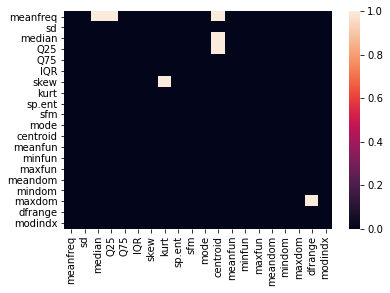

In [6]:
max_corr = 0.9 #largest acceptable correlation value
corr_matrix = x.corr().abs() #get absolute values for correlation
#work with upper triangular matrix, corr_matrix is symmetric
upper = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(np.bool))
sns.heatmap(upper>max_corr); #check for high collinearity

In [7]:
#drop columns/features
to_drop = [column for column in upper.columns if any(upper[column] > max_corr)]
x.drop(to_drop, axis=1, inplace=True)
print('Drop features: ', to_drop)
print('Rank: ', matrix_rank(x), '\nShape: ', x.shape)

Drop features:  ['median', 'Q25', 'kurt', 'centroid', 'dfrange']
Rank:  15 
Shape:  (3168, 15)


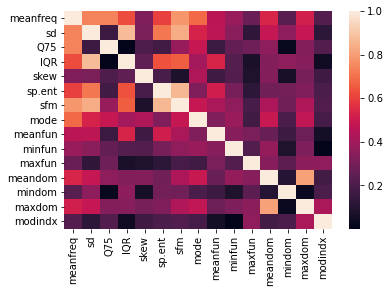

In [8]:
#check the new correlation matrix
corr_matrix = x.corr().abs();
sns.heatmap(corr_matrix);

# Is data balanced?

Yes, observations have 50/50 split across male and female labels.

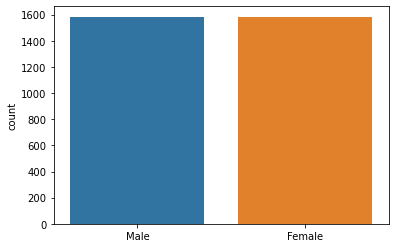

In [9]:
sns.countplot(x=y); #equal counts of male and female data
plt.xticks(np.arange(2), ('Male','Female'));

# Cross-validation and Model training

In [10]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
#split into training and testing data
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2,shuffle=True)

# **SVM**


SVM training accuracy: 0.97 (+/- 1.80)
SVM prediction accuracy: 0.98


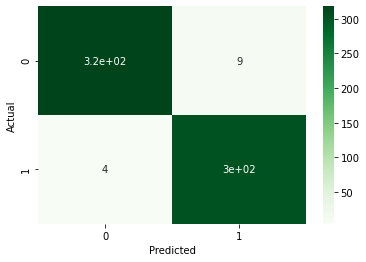

In [11]:
from sklearn.svm import SVC
#create classifier objects.
svm = SVC(kernel='linear')
#fit the model
svm.fit(x_train,y_train)
#perform cross validation
scores = cross_val_score(svm,x,y)#get cross validation score
#do prediction
y_pred = svm.predict(x_test)
print("SVM training accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 100*scores.std()))
print("SVM prediction accuracy: %0.2f" % accuracy_score(y_test, y_pred))
#check confusion matrix
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="Greens");

# **Logistic Regression**

LR training accuracy: 0.97 (+/- 1.67)
LR prediction accuracy: 0.98


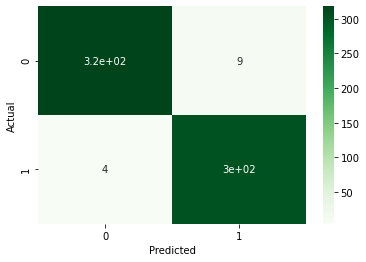

In [12]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression(max_iter=200)
LR.fit(x_train, y_train)
scores = cross_val_score(LR,x,y)
y_pred = svm.predict(x_test)
print("LR training accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 100*scores.std()))
print("LR prediction accuracy: %0.2f" % accuracy_score(y_test, y_pred))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="Greens");

# **Random Forest**

RF training accuracy: 0.97 (+/- 1.28)
RF prediction accuracy: 0.98


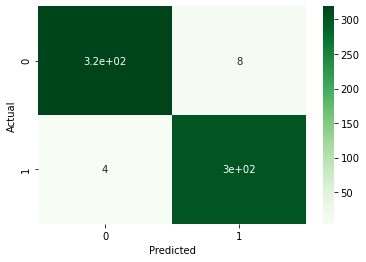

In [13]:
from sklearn.ensemble import RandomForestClassifier
RF = RandomForestClassifier(max_depth=10)
RF.fit(x_train, y_train)
y_pred = RF.predict(x_test)
scores = cross_val_score(RF,x,y)
print("RF training accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), 100*scores.std()))
print("RF prediction accuracy: %0.2f" % accuracy_score(y_test, y_pred))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="Greens");

# **Neural Network**

NN training accuracy: 0.96 (+/- 0.02)
NN prediction accuracy: 0.98


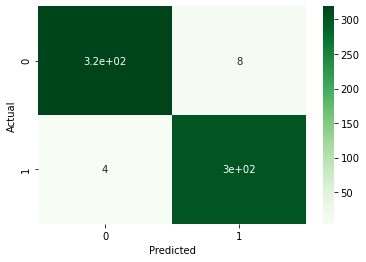

In [14]:
from sklearn.neural_network import MLPClassifier

NN = MLPClassifier(random_state = 100,max_iter=500)
NN.fit(x_train, y_train);
scores = cross_val_score(NN,x,y)
y_pred = NN.predict(x_test)
print("NN training accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std()))
print("NN prediction accuracy: %0.2f" % accuracy_score(y_test, y_pred))
confusion_matrix = pd.crosstab(y_test, y_pred, rownames=['Actual'], colnames=['Predicted'])
sns.heatmap(confusion_matrix, annot=True, cmap="Greens");